In [3]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img_rows , img_cols = 28,28
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# If the data format is ---> not the way i want
if K.image_data_format() == 'channels_first':
    # Reshape training and testing data to shape (samples, channels, height, width)
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    # Define input shape with channels first
    input_shape = (1, img_rows, img_cols)

else:
    # Reshape training and testing data to shape (samples, height, width, channels) ---> it's already the way i want :)
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    # Define input shape with channels last
    input_shape = (img_rows, img_cols, 1)

In [6]:
# Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_test.shape

(10000, 28, 28, 1)

In [9]:
# Convert class items to binary class matrices, (0,1,2,.....,9) as binary
y_train = keras.utils.to_categorical(y_train, 10) # ten classes from 0 to 9
y_test = keras.utils.to_categorical(y_test, 10)   # ten classes from 0 to 9

# **Creating the CNN model**

In [10]:
cnn_model = Sequential()
# Input Layers
cnn_model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape)) # the kernel_size here will get 3 out of the pixles of the original pic
cnn_model.add(Conv2D(64,(3,3),activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Hidden Layer one
# operation will take a 2x2 block of pixels from the input feature map and reduce it to a single value
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
# 25% of the neurons in the preceding layer will be randomly ignored during each training iteration
# to prevent overfitting, learn redundant, robust features and helping to generalize better to unseen data
cnn_model.add(Dropout(0.25))

In [13]:
# Hidden Layer two
cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation='relu'))

In [14]:
# The same here, A higher dropout rate is typically used in fully connected layers, like the one with 128 neurons
# to help ensure that the network doesn't become too dependent on specific nodes
cnn_model.add(Dropout(0.5))

In [15]:
# Output Layer
cnn_model.add(Dense(10,activation='softmax'))

In [16]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
cnn_model.compile (optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [18]:
model_history = cnn_model.fit(x_train, y_train,
                  batch_size=128,
                  epochs=12,
                  verbose=1,
                  validation_data=(x_test, y_test))

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8475 - loss: 0.4861 - val_accuracy: 0.9826 - val_loss: 0.0510
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9740 - loss: 0.0888 - val_accuracy: 0.9854 - val_loss: 0.0450
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9792 - loss: 0.0682 - val_accuracy: 0.9884 - val_loss: 0.0355
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9836 - loss: 0.0526 - val_accuracy: 0.9905 - val_loss: 0.0309
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9870 - loss: 0.0436 - val_accuracy: 0.9892 - val_loss: 0.0314
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9882 - loss: 0.0392 - val_accuracy: 0.9917 - val_loss: 0.0281
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9886 - loss: 0.0359 - val_accuracy: 0.9916 - val_loss: 0.0270
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9884 - loss: 0.0338 - val_accuracy: 

In [19]:
test_loss, test_acc = cnn_model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 1s - 3ms/step - accuracy: 0.9907 - loss: 0.0302

Test accuracy: 0.9907000064849854

Test loss: 0.03018353506922722


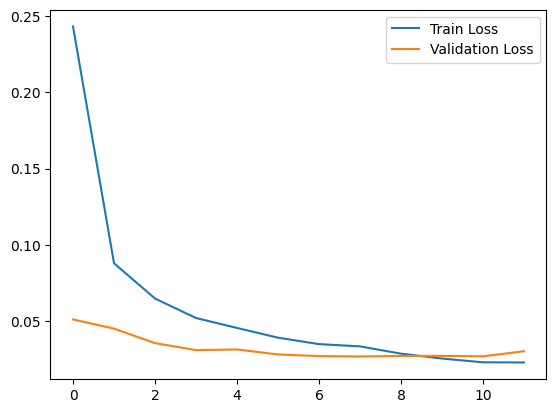

In [20]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

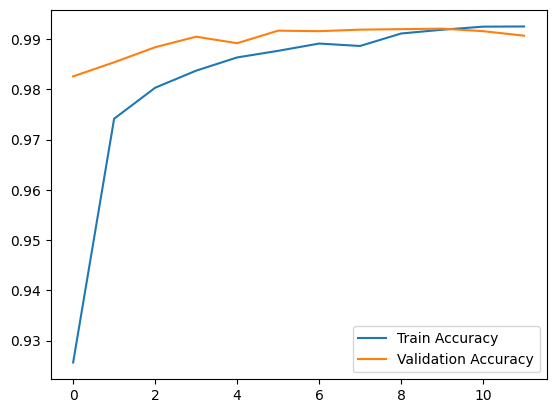

In [21]:
plt.plot(model_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

In [42]:
cnn_model.save('cnn_model.h5')

In [60]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

# Function to load and prepare the image
def load_image(filename):
    # Load the image with specified properties
    img = load_img(filename, color_mode='grayscale', target_size=(28, 28))

    # Convert the image to an array
    img = img_to_array(img)

    # Reshape the array into a single sample with 1 channel (for grayscale)
    img = img.reshape(1, 28, 28, 1)

    # Prepare pixel data by normalizing values
    img = img.astype('float32')
    img = img / 255.0
    return img

In [79]:
def run_model(original_label):
    # Load and prepare the image
    img_path = '/content/sample_image.png'
    img = load_image(img_path)

    # Load the model
    model = load_model('/content/cnn_model.h5')

    # Predictions
    result = model.predict(img)
    predicted_class = np.argmax(result, axis=-1)[0]

    # Plotting both the image and the prediction bar chart
    plt.figure(figsize=(10, 4))

    # Show the original image
    plt.subplot(1, 2, 1)
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.title(f"Original Label: {original_label}")
    plt.axis('off')

    # Show the prediction probabilities as a bar chart
    plt.subplot(1, 2, 2)
    plt.bar(range(len(result[0])), result[0], color='gray')
    plt.title(f"Predicted: {predicted_class}")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.xticks(range(len(result[0])))

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


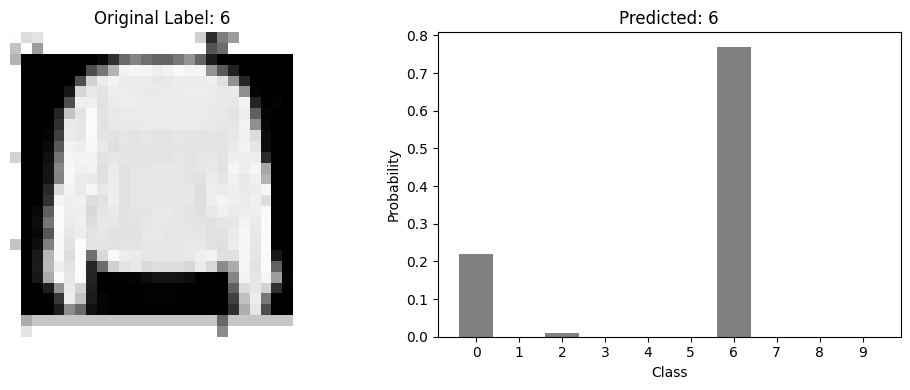

In [81]:
run_model(original_label=6)